# ***Prueba - Fundamentos Data Science***.
### Nombre(s): Thomas Peet, Braulio Aguila, Camilo Ramírez
### Generación: G47
### Profesores: Alfonso Tobar - Sebastián Ulloa
### Fecha: 05-08-2022

## ***Hito1***: ***Preliminares y Aspectos Computacionales***

### Desafío 1: Determinantes del ingreso  
Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas  
socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza  
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa  
de las Naciones Unidas para el Desarrollo.  
Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo  
presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de  
atributos sociodemográficos.  

#### Propuesta para resolver el desafío:
Como es posible revisar en el enunciado, se solicita un modelo para predecir la probabilidad   
de que un individuo presente salarios por sobre o bajo los 50.000 dolares anuales, en base a una   
serie de variables. Al revisar la data asociada a este problema, y el vector objetivo que se indica,   
se identifica una problemática que es posible resolver a través de modelamiento por **regresión logística**,   
debido a que el vector objetivo es discreto, y es una categoria binaria, por sobre o bajo el promedio.        
Las métricas para medir la calidad y desempeño de las predicciones de nuestro modelo, serán:   
- accuracy  
- precision  
- recall  
- f1 score  
- ROC AUC    

Métricas que sirven para evaluar el rendimiento de un modelo supervisado en tareas de clasificación.  
Para ejecutar la propuesta anterior, es necesario cargar la data, analizar y visualizar cada una de las variables  
y nuestro vector objetivo, además de realizar limpieza y preprocesamiento de la data entregada, con el fin de poder   
realizar, en primera instancia, un modelamiento descriptivo, el que permitira un análisis estadístico       
preliminar, además de permitir discriminar las variables que tienen un mayor efecto en nuestro vector objetivo.       
Seguido de lo anterior, se realiza modelación predictiva y la evaluación del desempeño del modelo. 

In [53]:
# Importación de cada una de las librerias necesarias para ejecutar la solución propuesta anteriormente:

# PANDAS, NUMPY, PYPLOT y SEABORN serán usadas para cargar la data, limpiarla y generar gráficas necesarias para nuestro análisis:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STATSMODELS, se usará para poder generar un modelo descriptivo:
import statsmodels.api as sm

# FEATURE ENGINE se usarán objetos enfocadaos principalmente al preprocesamiento de la data antes de modelarla, especificimente imputación y escalado:
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.wrappers import SklearnTransformerWrapper
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import CategoricalImputer

'''SCIKIT-LEARN, desde aquí se importaran una serie de funciones y objetos que contribuiran al preprocesamiento, separación de la data, modelación predictiva, 
reducción de dimensionalidad y evaluación de desempeño del modelo:'''
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures 
from sklearn.impute import KNNImputer, SimpleImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html #documentación de KNNI imputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# OTROS, importación de las funciones alojadas en el archivo "helpers.py" y uso de html para presentación de datos:
from IPython.display import HTML
import helpers as hp
import warnings #visualización limpia del output de nuestro código


#### Preprocesamiento y recodificación de los datos. De acuerdo al enunciado se necesitará hacer lo siguiente:

Aspectos a considerar:
- Identificar y recodificar los valores nulos.
- Recodificar variables de acuerdo a nomenclatura y nuevo nombre de columna indicada.
- Recodificar y agrupo países (native-country) como un continente (region).
- Binarizar el vector objetivo.

Además, en el preprocesamiento se resuelve:
- Imputación de valores nulos (por la moda para variables categóricas y promedio para variables númericas). Para este caso se usaron varios métodos.
- Recodificar variables según se indica.
- Escalar la data (númerica).

## ***Hito 2***: ***Descripción***

In [54]:
#Cargar el dataframe indicado y visualizar su data:
df = pd.read_csv('income-db.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# ***Listado de variables***:
* `age`: Edad del individuo.
* `workclass`: Naturaleza de la organización que emplea al individuo.
* `education`: Nivel educacional del individuo:
    | Variable          | Explicación                       |
    | ----------------- | ------------------                |
    | __Bachelors__     | (Licenciado)                      |
    | __Some-college__  | (Superior incompleta)             |
    | __11th__          | (3ro medio)                       |
    | __HS-grad__       | (Secundaria completa)             |
    | __Prof-school__   | (Escuela profesional)             |
    | __ssoc-acdm__     | (Técnico superior administrativo) |
    | __Assoc-voc__     | (Técnico superior vocacional)     |
    | __9th__           | (1ro medio)                       |
    | __7th-8th__       | (7mo-8vo)                         |
    | __12th__          | (4to medio)                       |
    | __Masters__       | (Maestría de postgrado)           |
    | __1st-4th__       | (1ro-4to básico)                  |
    | __10th__          | (2do medio)                       |
    | __Doctorate__     | (Doctorado)                       |
    | __5th-6th__       | (5to-6to)                         |
    | __Preschool__     | (Preescolar).                     |
     
    <br>  
    
* `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado
* `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
* `fnlwgt`: Ponderador muestral.
* `marital-status`: Estado civil del individuo: 
    | Variable                  | Explicación                   |
    | ---------------------     | ------------------            |
    | __Married-civ-spouse__    | (Casado/a régimen civil)      |
    | __Divorced__              | (Divorciado/a),               |
    | __Never-married__         | (Soltero/a)                   |
    | __Separated__             | (Separado/a),                 |
    | __Widowed__               | (Viudo/a)                     |
    | __Married-spouse-absent__ | (Casado con esposo/a ausente) |
    | __Married-AF-spouse__     | (Casado/a régimen castrense). |  
 
    <br>  
    
* `occupation`: Ocupación del individuo: 

    | Variable              | Explicación                           |
    | --------------------- | ------------------                    |
    | __Tech-support__      | (Soporte técnico),                    |
    | __Craft-repair__      | (Reparaciones),                       |
    | __Other-service__     | (Otros servicios),                    |
    | __Sales__             | (Ventas)                              |
    | __Exec-managerial__   | (Ejecutivo administrativos),          |
    | __Prof-specialty__    | (Profesores)                          |
    | __Handlers-cleaners__ | (Aseo y ornato)                       |
    | __Machine-op-inspct__ | (Inspectores de maquinarias)          |
    | __Adm-clerical__      | (Administrativos servicio al cliente) |
    | __Farming-fishing__   | (Pesca-ganadería),                    |
    | __Transport-moving__  | (Transporte)                          |
    | __Priv-house-serv__   | (Asesor del hogar)                    |
    | __Protective-serv__   | (servicios de seguridad)              |
    | __Armed-Forces__      | (Fuerzas armadas).                    |
 
    <br>  
    
* `relationship`: Relación respecto a su familia 

    | Variable              | Explicación                   |
    | --------------------- | ------------------            |
    | __Wife__              | (Esposa)                      |
    | __Own-child__         | (hijo único)                  |
    | __Husband__           | (Esposo)                      |
    | __Not-in-family__     | (No pertenece a la familia)   |
    | __Other-relative__    | (Familiar de otro tipo)       |
    | __Unmarried__         | (Soltero).                    |
     
    <br>  
    
* `race`: Raza del encuestado 
    | Variable                  | Explicación                               |
    | ---------------------     | ------------------                        |
    | __White__                 | (Blanco caucásico)                        |
    | __Asian-Pac-Islander__    | (Isleño del Asia Pacífico)                |
    | __Amer-Indian-Eskimo__    | (Pertenenciente a pueblos originarios)    |
    | __Other__                 | (Otro grupo )                             |
    | __Black__                 | (Afroamericano).                          |
         
    <br>  
    
* `sex`: Sexo del encuestado.
* `hours-per-week`: Cantidad de horas trabajadas por semana.
* `native-country`: País de origen. 

    | Países | | | | | |
    | ------- | ------- | ------- | ------- | ------- | ------- |
    | United-States| Cambodia| England| Puerto-Rico| Canada| Germany |
    | Outlying-US(Guam-USVI-etc)| India| Japan| Greece| South| China |
    | Cuba| Iran| Honduras| Philippines| Italy| Poland |
    | Jamaica| Vietnam| Mexico| Portugal| Ireland| France |
    | Dominican-Republic| Laos| Ecuador| Taiwan| Haiti| Columbia |
    | Hungary| Guatemala| Nicaragua| Scotland| Thailand| Yugoslavia |
    | El-Salvador| Trinadad&Tobago| Peru| Hong| Holand-Netherlands | |
     
    <br>  
    
* `income` (Este es su vector objetivo): 
    - __<=50K__ Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, 
    - __>50K__ si el individuo percibe ingresos superiores a 50.000 dólares anuales. 





In [55]:
#Detalle de la información asociada a las variables:
df.info(verbose=True, show_counts=True,memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)

In [56]:
#Revisar tipos de datos:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [57]:
# Separar target de descriptores:
y = np.where(df.income == "<=50K", 0, 1) # if vectorizado  
X = df.drop(columns=['income'])

In [58]:
# Descripción de variables categoricas (en base a su distribución de frecuencias) y variables numéricas por separado:
hp.describe_variables(X)

------------------------------------------------------------
-------------------Variables Categóricas--------------------
------------------------------------------------------------


,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
workclass,33906,3862,3136,2799,1981,1695,1432,21,10


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
education,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
marital-status,22379,16117,6633,1530,1518,628,37


,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
occupation,6172,6112,6086,5611,5504,4923,3022,2809,2355,2072,1490,1446,983,242,15


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
relationship,19716,12583,7581,5125,2331,1506


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
race,41762,4685,1519,470,406


,Male,Female
gender,32650,16192


,United-States,Mexico,?,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,China,South,Jamaica,Italy,Dominican-Republic,Japan,Guatemala,Poland,Vietnam,Columbia,Haiti,Portugal,Taiwan,Iran,Greece,Nicaragua,Peru,Ecuador,France,Ireland,Hong,Thailand,Cambodia,Trinadad&Tobago,Laos,Yugoslavia,Outlying-US(Guam-USVI-etc),Scotland,Honduras,Hungary,Holand-Netherlands
native-country,43832,951,857,295,206,184,182,155,151,138,127,122,115,106,105,103,92,88,87,86,85,75,67,65,59,49,49,46,45,38,37,30,30,28,27,23,23,23,21,20,19,1


------------------------------------------------------------
-------------------Variables Numéricas----------------------
------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.6,13.7,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.1,105604.0,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.1,2.6,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.1,7452.0,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.5,403.0,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.4,12.4,1.0,40.0,40.0,45.0,99.0


In [59]:
# Definición del diccionario de reagrupamiento de clases.
recoding_classes = {
    "occupation": {
                    "white-collar"      : ["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"],
                    "blue-collar"       : ["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", "Protective-serv", "Priv-house-serv"],
                    "others"            : ["Other-service", "Armed-Forces"]
                },
    "workclass": {
                    "federal-gov"       : ["Federal-gov"],
                    "state-level-gov"   : ["State-gov", "Local-gov"],
                    "self-employed"     : ["Self-emp-inc", "Self-emp-not-inc"],
                    "unemployed"        : ["Never-worked", "Without-pay"]
    },
    "education": {
                    "preschool"         : ["Preschool"],
                    "elementary-school" : ["1st-4th", "5th-6th"],
                    "high-school"       : ["7th-8th", "9th", "10th","11th", "12th", "HS-grad"],
                    "college"           : ["Assoc-voc", "Assoc-acdm", "Some-college"],
                    "university"        : ["Bachelors", "Masters", "Prof-school", "Doctorate"]
    },
    "marital-status": {
                    "married"           : ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"],
                    "divorced"          : ["Divorced"],
                    "separated"         : ["Separated"],
                    "widowed"           : ["Widowed"]
    },
    "native-country": {
                    "america": ["United-States", "Puerto-Rico", "Canada", "Honduras", "Mexico", "Columbia", "Haiti", "Peru", "Ecuador", "El-Salvador", "Jamaica", "Cuba", "Dominican-Republic", "Guatemala", "Nicaragua", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)"],
                    "europe"            : ["England","Greece","Germany","France","Yugoslavia","Ireland","Holand-Netherlands","Scotland","Poland","Portugal","Italy","Hungary"],
                    "asia"              : ["Cambodia", "India", "Japan", "China","Philippines","South","Thailand","Hong","Laos","Taiwan","Vietnam","Iran"],
                    "oceania"           : [],
                    "africa"            : []
    }
}

# Agrupamiento de clases
X_initial = X.copy()
for variable in recoding_classes.keys():
    for class_name in recoding_classes[variable].keys():
        X[variable].mask(X[variable].isin(recoding_classes[variable][class_name]), class_name, inplace=True)
# hp.describe_variables(df)

In [60]:
# Definición de diccionario de reetiquetado de algunas variables.
recoding_variables = {
    "ocupation"         : "collars",
    "workclass"         : "workclass_recod",
    "education"         : "educ_recod",
    "marital-status"    : "civstatus",
    "native-country"    : "region"
}
X.rename(columns=recoding_variables, inplace=True)
pd.DataFrame(pd.Series(X.columns).T).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region


In [61]:
# Setear los valores '?' como nan en el dataframe. La inspección en la base indica que solo los valores '?' representan datos perdidos.
X.replace('?', np.nan, inplace=True)
X_initial.replace('?', np.nan, inplace=True)

## ***Hito 3 y 4***: ***Modelación descriptiva y predictiva***

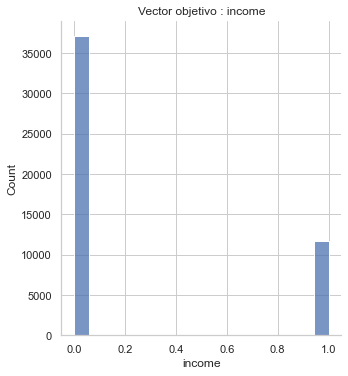

In [79]:
#Visualización de el vector objetivo:
sns.displot(y); # Categoría uno muchos menos casos que categoría 0.
plt.title("Vector objetivo : income")
plt.xlabel("income");

# Definiciones de transformadores y modelos.

In [64]:
# Scalers
sc = StandardScaler()

# Encoders
oe = OrdinalEncoder()
# ohe = SklearnTransformerWrapper(OneHotEncoder(drop_last = True), variables=cat_variables.to_list())
ohe = lambda df: OneHotEncoder(drop_last = True, variables=df.select_dtypes(include=['object','string']).columns.to_list())   # va a depender de la matriz que se encodee por que tendran distinto número de columnas categóricas

# Non-linear Transformations
pl = lambda df: SklearnTransformerWrapper(PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), variables = df.select_dtypes(include=['number']).columns.to_list())
# https://www.reddit.com/r/learnmachinelearning/comments/a7rggk/is_it_okay_to_add_polynomial_features_to/

# Imputers
ci          = lambda df: CategoricalImputer(imputation_method='frequent', variables = df.select_dtypes(include=['object','string']).columns.to_list())
si          = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=1, weights="uniform")
# https://stackoverflow.com/questions/64900801/implementing-knn-imputation-on-categorical-variables-in-an-sklearn-pipeline

# Dimensionality reduction
pca = lambda comps: PCA(random_state=42, n_components=comps)

# Clasificadores
lr = LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000)

# Valditation method
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Imputación 

In [65]:
#Codificación para usar KNNImputer y luego se hace decodificación:
def enc_imp_denc(X):
    ### ENCODING ###
    # Encodeo de variables categoricas usando OrdinalEncoder. Este encodeo se hace para poder utilizar los imputadores como KNNImputer.
    encoded_features = oe.fit_transform(X.copy())
    df_enc = pd.DataFrame(encoded_features, index=X.index, columns=X.columns)
    display(df_enc.head(3))
    # Diccionario que relaciona las categorias reales con las categorias encodeadas. Se usará para restaurar los nombres de categorías originales.
    encoding = oe.categories_   # categorias encodeadas
    cat_variables, _ = hp.get_type_vars(X)
    encoding_full = {feature_name: hp.encoding_feature(encoding[feature_pos]) for feature_name,feature_pos in zip(df.columns, range(len(df.columns))) if feature_name in cat_variables} 
    # hp.pretty(encoding_full)

    ### IMPUTATION ###
    # Imputación con SimpleImputer de variables encodeadas con OrdinalEncoder
    imputed_features_simple = si.fit_transform(df_enc.copy())
    df_imp_simple = pd.DataFrame(imputed_features_simple, index=X.index, columns=X.columns)
    display(df_imp_simple.head(3))
    # Imputación con K-NearestNeighbourImputer de variables encodeadas con OrdinalEncoder
    imputed_features = knn_imputer.fit_transform(df_enc.copy())
    df_imp_knn = pd.DataFrame(imputed_features, index=X.index, columns=X.columns)
    display(df_imp_knn.head(3))

    ### DE-ENCODING ###
    # Una vez imputadas, las variables categoricas se restauran en sus valores originales.
    df_imp_simple_or = pd.DataFrame(oe.inverse_transform(df_imp_simple), index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)
    df_imp_knn_or    = pd.DataFrame(oe.inverse_transform(df_imp_knn)   , index=X.index, columns=X.columns).convert_dtypes(infer_objects=True, convert_string=False, convert_integer=True, convert_boolean=True, convert_floating=True)

    return df_imp_simple_or, df_imp_knn_or, encoding_full

df_imp_simple_or, df_imp_knn_or, encoding_full = enc_imp_denc(X) # Estas son los dataframes que utilizaremos.
df_imp_simple_or_initial, df_imp_knn_or_initial, encoding_full_initial = enc_imp_denc(X_initial) # Solo se usa para mostrar la diferencia de imputación entre knn y simple. No se usa después de esto.


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region
0,8.0,0.0,19329.0,2.0,6.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,39.0,0.0
1,21.0,0.0,4212.0,2.0,8.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,49.0,0.0
2,11.0,3.0,25340.0,0.0,11.0,2.0,0.0,0.0,4.0,1.0,0.0,0.0,39.0,0.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,8.0,3.0,19329.0,1.0,6.0,4.0,6.0,3.0,2.0,1.0,0.0,0.0,39.0,38.0
1,21.0,3.0,4212.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,49.0,38.0
2,11.0,1.0,25340.0,7.0,11.0,2.0,10.0,0.0,4.0,1.0,0.0,0.0,39.0,38.0


In [66]:
#Se despliega información sobre el resultado de las variables trás la imputación y codificación de estas:

null_values = {}
cat_variables = df.drop(columns='income').select_dtypes(include=['object']).columns
if True:
    for col in cat_variables:
        display(HTML(f'<div style="background-color:tomato;color:white;font-size:22px;margin:0 auto;display:inline-block;padding:10px 20px;text-align:center">Variable: {col}</div>'))
        col_esp = recoding_variables[col] if col in recoding_variables.keys() else col
        print('DF NORMAL')
        display(pd.DataFrame(                  df[col].value_counts()).T.style.pipe(hp.make_pretty))
        print('DF NORMAL KNN IMPUTER')
        display(pd.DataFrame(   df_imp_knn_or[col_esp].value_counts()).T.style.pipe(hp.make_pretty))
        print('DF NORMAL SIMPLE IMPUTER')
        display(pd.DataFrame(df_imp_simple_or[col_esp].value_counts()).T.style.pipe(hp.make_pretty))
    print('*********************************************************************')


DF NORMAL


,Private,Self-emp-not-inc,Local-gov,?,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
workclass,33906.00,3862.00,3136.00,2799.00,1981.00,1695.00,1432.00,21.00,10.00


DF NORMAL KNN IMPUTER


,Private,self-employed,state-level-gov,federal-gov,unemployed
workclass_recod,36045.00,5843.00,5416.00,1503.00,35.00


DF NORMAL SIMPLE IMPUTER


,Private,self-employed,state-level-gov,federal-gov,unemployed
workclass_recod,36705.00,5557.00,5117.00,1432.00,31.00


DF NORMAL


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
education,15784.00,10878.00,8025.00,2657.00,2061.00,1812.00,1601.00,1389.00,955.00,834.00,756.00,657.00,594.00,509.00,247.00,83.00


DF NORMAL KNN IMPUTER


,high-school,college,university,elementary-school,preschool
educ_recod,21353.00,14540.00,12110.00,756.00,83.00


DF NORMAL SIMPLE IMPUTER


,high-school,college,university,elementary-school,preschool
educ_recod,21353.00,14540.00,12110.00,756.00,83.00


DF NORMAL


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
marital-status,22379.00,16117.00,6633.00,1530.00,1518.00,628.00,37.00


DF NORMAL KNN IMPUTER


,married,Never-married,divorced,separated,widowed
civstatus,23044.00,16117.00,6633.00,1530.00,1518.00


DF NORMAL SIMPLE IMPUTER


,married,Never-married,divorced,separated,widowed
civstatus,23044.00,16117.00,6633.00,1530.00,1518.00


DF NORMAL


,Prof-specialty,Craft-repair,Exec-managerial,Adm-clerical,Sales,Other-service,Machine-op-inspct,?,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
occupation,6172.00,6112.00,6086.00,5611.00,5504.00,4923.00,3022.00,2809.00,2355.00,2072.00,1490.00,1446.00,983.00,242.00,15.00


DF NORMAL KNN IMPUTER


,white-collar,blue-collar,others
occupation,26200.00,17243.00,5399.00


DF NORMAL SIMPLE IMPUTER


,white-collar,blue-collar,others
occupation,27628.00,16276.00,4938.00


DF NORMAL


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
relationship,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL KNN IMPUTER


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
relationship,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL SIMPLE IMPUTER


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
relationship,19716.00,12583.00,7581.00,5125.00,2331.00,1506.00


DF NORMAL


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
race,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL KNN IMPUTER


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
race,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL SIMPLE IMPUTER


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
race,41762.00,4685.00,1519.00,470.00,406.00


DF NORMAL


,Male,Female
gender,32650.00,16192.00


DF NORMAL KNN IMPUTER


,Male,Female
gender,32650.00,16192.00


DF NORMAL SIMPLE IMPUTER


,Male,Female
gender,32650.00,16192.00


DF NORMAL


,United-States,Mexico,?,Philippines,Germany,Puerto-Rico,Canada,El-Salvador,India,Cuba,England,China,South,Jamaica,Italy,Dominican-Republic,Japan,Guatemala,Poland,Vietnam,Columbia,Haiti,Portugal,Taiwan,Iran,Greece,Nicaragua,Peru,Ecuador,France,Ireland,Hong,Thailand,Cambodia,Trinadad&Tobago,Laos,Yugoslavia,Outlying-US(Guam-USVI-etc),Scotland,Honduras,Hungary,Holand-Netherlands
native-country,43832.00,951.00,857.00,295.00,206.00,184.00,182.00,155.00,151.00,138.00,127.00,122.00,115.00,106.00,105.00,103.00,92.00,88.00,87.00,86.00,85.00,75.00,67.00,65.00,59.00,49.00,49.00,46.00,45.00,38.00,37.00,30.00,30.00,28.00,27.00,23.00,23.00,23.00,21.00,20.00,19.00,1.00


DF NORMAL KNN IMPUTER


,america,asia,europe
region,46913.00,1135.00,794.00


DF NORMAL SIMPLE IMPUTER


,america,asia,europe
region,46966.00,1096.00,780.00


*********************************************************************


In [67]:
for cat in cat_variables:
    display(HTML(f'<div style="background-color:tomato;color:white;font-size:22px;margin:0 auto;display:inline-block;padding:10px 20px;text-align:center">Variable: {cat}</div>'))
    display(pd.DataFrame(
        {
            'pre-imputation':                                 df[cat].value_counts(normalize=False),
            'post-imputation-knn':         df_imp_knn_or_initial[cat].value_counts(normalize=False),
            'post-imputation-simple':   df_imp_simple_or_initial[cat].value_counts(normalize=False)
        }).T.style.pipe(hp.make_pretty, num_format='{:.0f}'))
    display(pd.DataFrame(
        {
            'pre-imputation-%':                               df[cat].value_counts(normalize=True),
            'post-imputation-knn-%':       df_imp_knn_or_initial[cat].value_counts(normalize=True),
            'post-imputation-simple-%': df_imp_simple_or_initial[cat].value_counts(normalize=True)
        }).T.style.pipe(hp.make_pretty, num_format='{:,.6f}%'))

    # print('*********************************************************************')
    # hp.describe_variables(df_imp_simple_or)
    # print('*********************************************************************')
    # hp.describe_variables(df_imp_knn_or)

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
pre-imputation,2799,1432,3136,10,33906,1695,3862,1981,21
post-imputation-knn,nan,1504,3313,11,36022,1760,4101,2108,23
post-imputation-simple,nan,1432,3136,10,36705,1695,3862,1981,21


,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
pre-imputation-%,0.057307%,0.029319%,0.064207%,0.000205%,0.694198%,0.034704%,0.079071%,0.040559%,0.000430%
post-imputation-knn-%,nan%,0.030793%,0.067831%,0.000225%,0.737521%,0.036035%,0.083965%,0.043160%,0.000471%
post-imputation-simple-%,nan%,0.029319%,0.064207%,0.000205%,0.751505%,0.034704%,0.079071%,0.040559%,0.000430%


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
pre-imputation,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83
post-imputation-knn,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83
post-imputation-simple,15784,10878,8025,2657,2061,1812,1601,1389,955,834,756,657,594,509,247,83


,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,7th-8th,Prof-school,9th,12th,Doctorate,5th-6th,1st-4th,Preschool
pre-imputation-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%
post-imputation-knn-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%
post-imputation-simple-%,0.323164%,0.222718%,0.164305%,0.054400%,0.042197%,0.037099%,0.032779%,0.028439%,0.019553%,0.017075%,0.015478%,0.013452%,0.012162%,0.010421%,0.005057%,0.001699%


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
pre-imputation,22379,16117,6633,1530,1518,628,37
post-imputation-knn,22379,16117,6633,1530,1518,628,37
post-imputation-simple,22379,16117,6633,1530,1518,628,37


,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
pre-imputation-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%
post-imputation-knn-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%
post-imputation-simple-%,0.458192%,0.329982%,0.135805%,0.031325%,0.031080%,0.012858%,0.000758%


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
pre-imputation,2809,5611,15,6112,6086,1490,2072,3022,4923,242,6172,983,5504,1446,2355
post-imputation-knn,nan,6030,17,6399,6367,1585,2239,3197,5344,274,6443,1052,5870,1538,2487
post-imputation-simple,nan,5611,15,6112,6086,1490,2072,3022,4923,242,8981,983,5504,1446,2355


,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
pre-imputation-%,0.057512%,0.114881%,0.000307%,0.125138%,0.124606%,0.030507%,0.042423%,0.061873%,0.100794%,0.004955%,0.126367%,0.020126%,0.112690%,0.029606%,0.048217%
post-imputation-knn-%,nan%,0.123459%,0.000348%,0.131014%,0.130359%,0.032452%,0.045842%,0.065456%,0.109414%,0.005610%,0.131915%,0.021539%,0.120183%,0.031489%,0.050919%
post-imputation-simple-%,nan%,0.114881%,0.000307%,0.125138%,0.124606%,0.030507%,0.042423%,0.061873%,0.100794%,0.004955%,0.183879%,0.020126%,0.112690%,0.029606%,0.048217%


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
pre-imputation,19716,12583,7581,5125,2331,1506
post-imputation-knn,19716,12583,7581,5125,2331,1506
post-imputation-simple,19716,12583,7581,5125,2331,1506


,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
pre-imputation-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%
post-imputation-knn-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%
post-imputation-simple-%,0.403669%,0.257627%,0.155215%,0.104930%,0.047725%,0.030834%


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
pre-imputation,41762,4685,1519,470,406
post-imputation-knn,41762,4685,1519,470,406
post-imputation-simple,41762,4685,1519,470,406


,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
pre-imputation-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%
post-imputation-knn-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%
post-imputation-simple-%,0.855043%,0.095922%,0.031100%,0.009623%,0.008313%


,Male,Female
pre-imputation,32650,16192
post-imputation-knn,32650,16192
post-imputation-simple,32650,16192


,Male,Female
pre-imputation-%,0.668482%,0.331518%
post-imputation-knn-%,0.668482%,0.331518%
post-imputation-simple-%,0.668482%,0.331518%


,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
pre-imputation,857,28,182,122,85,138,103,45,155,127,38,206,49,88,75,1,20,30,19,151,59,37,105,106,92,23,951,49,23,46,295,87,67,184,21,115,65,30,27,43832,86,23
post-imputation-knn,nan,28,186,127,89,140,107,45,157,131,39,208,50,92,78,1,20,32,21,159,61,38,108,109,92,24,967,49,23,46,305,89,68,187,21,120,68,31,28,44587,88,23
post-imputation-simple,nan,28,182,122,85,138,103,45,155,127,38,206,49,88,75,1,20,30,19,151,59,37,105,106,92,23,951,49,23,46,295,87,67,184,21,115,65,30,27,44689,86,23


,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
pre-imputation-%,0.017546%,0.000573%,0.003726%,0.002498%,0.001740%,0.002825%,0.002109%,0.000921%,0.003173%,0.002600%,0.000778%,0.004218%,0.001003%,0.001802%,0.001536%,0.000020%,0.000409%,0.000614%,0.000389%,0.003092%,0.001208%,0.000758%,0.002150%,0.002170%,0.001884%,0.000471%,0.019471%,0.001003%,0.000471%,0.000942%,0.006040%,0.001781%,0.001372%,0.003767%,0.000430%,0.002355%,0.001331%,0.000614%,0.000553%,0.897424%,0.001761%,0.000471%
post-imputation-knn-%,nan%,0.000573%,0.003808%,0.002600%,0.001822%,0.002866%,0.002191%,0.000921%,0.003214%,0.002682%,0.000798%,0.004259%,0.001024%,0.001884%,0.001597%,0.000020%,0.000409%,0.000655%,0.000430%,0.003255%,0.001249%,0.000778%,0.002211%,0.002232%,0.001884%,0.000491%,0.019799%,0.001003%,0.000471%,0.000942%,0.006245%,0.001822%,0.001392%,0.003829%,0.000430%,0.002457%,0.001392%,0.000635%,0.000573%,0.912882%,0.001802%,0.000471%
post-imputation-simple-%,nan%,0.000573%,0.003726%,0.002498%,0.001740%,0.002825%,0.002109%,0.000921%,0.003173%,0.002600%,0.000778%,0.004218%,0.001003%,0.001802%,0.001536%,0.000020%,0.000409%,0.000614%,0.000389%,0.003092%,0.001208%,0.000758%,0.002150%,0.002170%,0.001884%,0.000471%,0.019471%,0.001003%,0.000471%,0.000942%,0.006040%,0.001781%,0.001372%,0.003767%,0.000430%,0.002355%,0.001331%,0.000614%,0.000553%,0.914971%,0.001761%,0.000471%


>>> **Obervación**: El ejercicio anterior muestra que el uso de KNNImputer frente a la a imputacion simple, favorece a una imputación de acuerdo con la distribución inicial y aparentemente más proporcional que la de una imputación simple, la que además también puede estar relacionada a un cierto cesgo.

In [68]:
X_knn    = df_imp_knn_or
X_simple = df_imp_simple_or

# Pre-procesamiento previo a la clasificación con Logistic Regresor (Codificación final y estandarización)

In [69]:
# Pipelines para encodear nuevamente y escalar la data.
pipes = {}

# Probaremos que combinen las siguientes transformaciones:
# - OneHotEncoder / OrdinalEncoder
# - SimpleImputer / KNN Imputer
# - sin PCA / distintos niveles de PCA
# Finalmente probaremos cada uno de los modelos

pipes["ohe_knn"]        = Pipeline(steps = [
                            ('ohe',ohe(X_knn)),
                            ('sc',sc),
                            ])

pipes["oe_knn"]         = Pipeline(steps = [
                            ('oe',oe),
                            ('sc',sc),
                            ])
                        
pipes["ohe_simple"]     = Pipeline(steps = [
                            ('ohe',ohe(X_simple)),
                            ('sc',sc),
                            ])

pipes["oe_simple"]      = Pipeline(steps = [
                            ('oe',oe),
                            ('sc',sc),
                            ])
for pca_comps in [10,13]:

    pipes[f"ohe_knn_pca_{pca_comps}"]    = Pipeline(steps = [
                                ('ohe',ohe(X_knn)),
                                ('pca', pca(comps=pca_comps)),
                                ('sc',sc),
                                ])

    pipes[f"oe_knn_pca_{pca_comps}"]    = Pipeline(steps = [
                                ('oe',oe),
                                ('pca', pca(comps=pca_comps)),
                                ('sc',sc),
                                ])

    pipes[f"ohe_simple_pca_{pca_comps}"] = Pipeline(steps=[
                                ('ohe', ohe(X_simple)),
                                ('pca', pca(comps=pca_comps)),
                                ('sc', sc),
                            ])
                            
    pipes[f"oe_simple_pca_{pca_comps}"] = Pipeline(steps=[
                                ('oe', oe),
                                ('pca', pca(comps=pca_comps)),
                                ('sc', sc),
                            ])


# Se define los dataframe que se usaran en cada modelo
X_imp = {}
models = list(pipes.keys())
for model in pipes.keys():
    if 'knn' in model:
        X_imp[model] = X_knn
    else:
        X_imp[model] = X_simple
display(X_imp.keys())

# Se probo aplicar polyfeatures pero se descarto su uso porque el score es despreciable (eso se vio posteriormente).
# pipe_ohe_knn_pl    = Pipeline(steps = [
#                         ('pl' , pl(X_knn)),
#                         ('ohe', ohe(X_knn)),
#                         ('sc' , sc),
#                         ])

X_trans = {} # La data de cada modelo procesado. Se transformará en Dataframe y se guardara en data_processed.
data_processed = {} # Dataframes de cada modelo, procesado

for model_key, pipe in pipes.items():
    X_trans[model_key] = pipe.fit_transform(X_imp[model_key].copy())
    if 'pca' in model_key:
        data_processed[model_key] = pd.DataFrame(X_trans[model_key])
    else:
        if 'ohe' in model_key:
            data_processed[model_key] = pd.DataFrame(X_trans[model_key], columns = pipe['ohe'].get_feature_names_out())
        else:
            data_processed[model_key] = pd.DataFrame(X_trans[model_key], columns = pipe['oe'].get_feature_names_out())

dict_keys(['ohe_knn', 'oe_knn', 'ohe_simple', 'oe_simple', 'ohe_knn_pca_10', 'oe_knn_pca_10', 'ohe_simple_pca_10', 'oe_simple_pca_10', 'ohe_knn_pca_13', 'oe_knn_pca_13', 'ohe_simple_pca_13', 'oe_simple_pca_13'])

# Modelos Explicativos

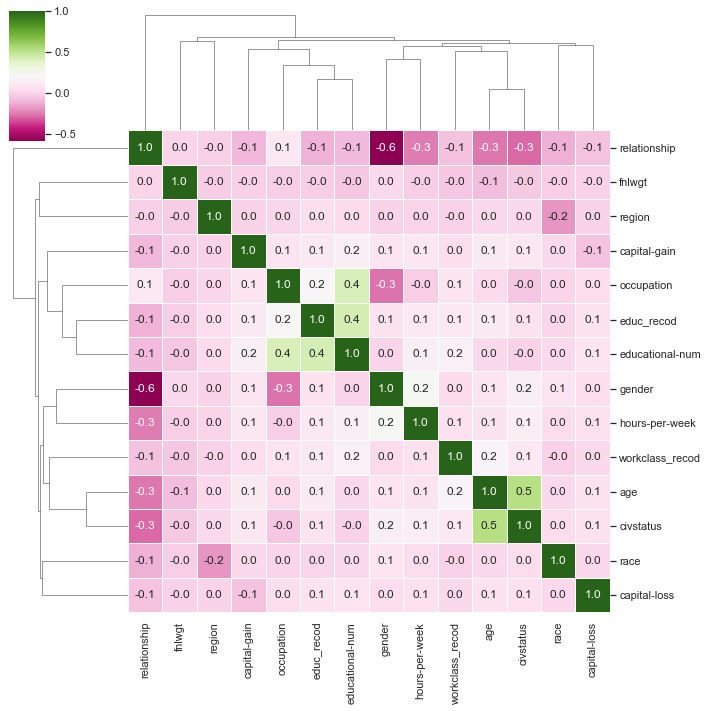

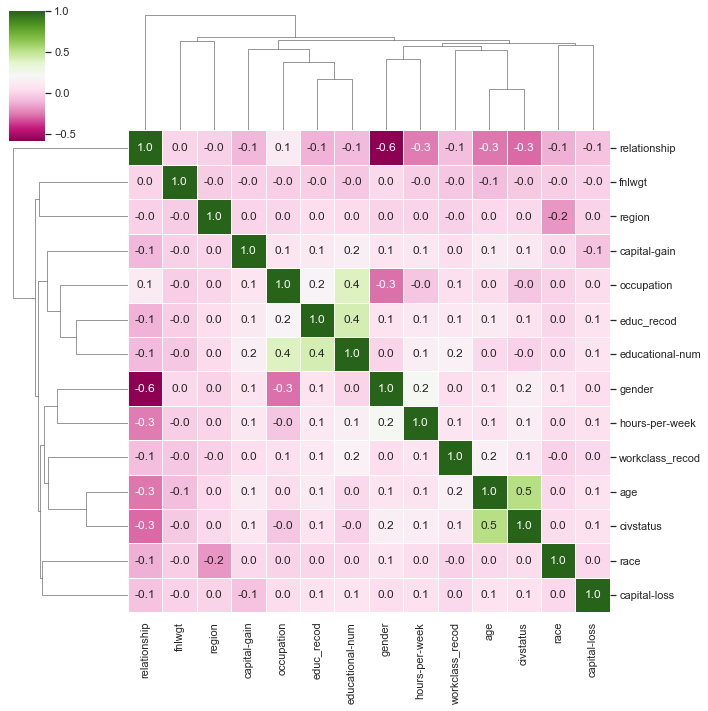

In [70]:
#Uso de cluster map para visualizar relaciones entre variables y poder contribuir a la construcción del modelo predictivo:
only_oe_models = ['oe_knn', 'oe_simple']
for model in only_oe_models:
    sns.set(font_scale=1, style='whitegrid')
    sns.clustermap(data_processed[model].corr(), annot=True, linewidth=0.9, cmap='PiYG', fmt='.1f')


In [71]:
#Modelos explicativos:
model_expl = {}
for model in only_oe_models:
    data_ct = sm.add_constant(data_processed[model])
    model_expl[model] = sm.Logit(y, data_ct).fit()
    print(f"--------------------------{model}_reduced------------------------------------")
    display(model_expl[model].summary())

Optimization terminated successfully.
         Current function value: 0.367554
         Iterations 7
--------------------------oe_knn_reduced------------------------------------


c:\Users\Braulio\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.3320
Time:                        20:23:43   Log-Likelihood:                -17952.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7631      0.017   -103.488      0.000      -1.797      -1.730
age                 0.2567      0.016     15.891      0.000       0.225       0.288
workclass_recod    -0.0422      0.013     -3.227      0.001      -0.068      -0.017
fnlwgt              0.0567      0.013      4.224      0.000       0.030       0.083
educ_recod         -0.0027      0.015     -0.183      0.855      -0.032       0.026
educational-num     0.8071      0.020     41.298      0.000       0.769       0.845
civstatus           0.7358      0.017     43.427      0.000       0.703       0.769
occupation          0.2794      0.015     18.581      0.000       0.250       0.309
relationship       -0.0821      0.020     -4.201      0.000      -0.120      -0.044
race                0.1162      0.015      7.684      0.000       0.087       0.146
gender              0.5154      0.021     24.280      0.000       0.474       0.557
capital-gain        0.6448      0.014     46.246      0.000       0.617       0.672
capital-loss        0.2772      0.012     24.086      0.000       0.255       0.300
hours-per-week      0.3934      0.014     27.697      0.000       0.366       0.421
region              0.0262      0.013      2.034      0.042       0.001       0.051
===================================================================================
"""

c:\Users\Braulio\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.368451
         Iterations 7
--------------------------oe_simple_reduced------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.3304
Time:                        20:23:43   Log-Likelihood:                -17996.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7588      0.017   -103.465      0.000      -1.792      -1.725
age                 0.2471      0.016     15.360      0.000       0.216       0.279
workclass_recod    -0.0159      0.013     -1.234      0.217      -0.041       0.009
fnlwgt              0.0579      0.013      4.318      0.000       0.032       0.084
educ_recod         -0.0029      0.015     -0.193      0.847      -0.032       0.026
educational-num     0.8205      0.020     42.039      0.000       0.782       0.859
civstatus           0.7346      0.017     43.383      0.000       0.701       0.768
occupation          0.2451      0.015     16.303      0.000       0.216       0.275
relationship       -0.0837      0.020     -4.289      0.000      -0.122      -0.045
race                0.1175      0.015      7.782      0.000       0.088       0.147
gender              0.5067      0.021     23.903      0.000       0.465       0.548
capital-gain        0.6453      0.014     46.369      0.000       0.618       0.673
capital-loss        0.2781      0.011     24.205      0.000       0.256       0.301
hours-per-week      0.3978      0.014     28.039      0.000       0.370       0.426
region              0.0284      0.013      2.214      0.027       0.003       0.054
===================================================================================
"""

### Construcción de nuevos modelos basados en la evaluación del p-value:

In [72]:
model_expl = {}
only_oe_models = ['oe_knn', 'oe_simple']
vars_to_remove = ['educ_recod', 'civstatus_widowed', 'civstatus_divorced', 'race_Other', 'race_Black', 'workclass_recod'] # Se uso el modelo descriptivo anterior para, según valores de p.value, descartar algunas de las variables. En el bloque de arriba solo se ve el analisis para los modelos OrdinalEncoder, pero se aplicó también para los OneHotencoder y se encontró que algunas de las variables binarias generadas, también eran descartables.
data_processed_remove = {}
models_reduced = []
for model in models:
    real_vars_to_remove = []
    for var in vars_to_remove:
        real_vars_to_remove = real_vars_to_remove + [s for s in data_processed[model].columns.to_list() if var in str(s)]
    data_processed_remove[f"{model}_reduced"] = data_processed[model].drop(columns = real_vars_to_remove)
    data_ct = sm.add_constant(data_processed_remove[f"{model}_reduced"])
    models_reduced = models_reduced + [f"{model}_reduced"]
    model_expl[f"{model}_reduced"] = sm.Logit(y, data_ct).fit()  # Guardo un nuevo modelo con las variables descartadas
    # print(f"--------------------------{model}_reduced------------------------------------")
    # display(model_expl[f"{model}_reduced"].summary())

# Agregamos los nombres de los modelos reducidos y sus dataframes asociadas
models = list(models) + models_reduced 
data_processed = {**data_processed, **data_processed_remove}

c:\Users\Braulio\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.326202
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.367662
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.327086
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.368467
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.341253
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377338
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.339383
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.377461
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.336532
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.367576
  

# Clasificación (Cross Validation KFold(5))

In [73]:
models

['ohe_knn',
 'oe_knn',
 'ohe_simple',
 'oe_simple',
 'ohe_knn_pca_10',
 'oe_knn_pca_10',
 'ohe_simple_pca_10',
 'oe_simple_pca_10',
 'ohe_knn_pca_13',
 'oe_knn_pca_13',
 'ohe_simple_pca_13',
 'oe_simple_pca_13',
 'ohe_knn_reduced',
 'oe_knn_reduced',
 'ohe_simple_reduced',
 'oe_simple_reduced',
 'ohe_knn_pca_10_reduced',
 'oe_knn_pca_10_reduced',
 'ohe_simple_pca_10_reduced',
 'oe_simple_pca_10_reduced',
 'ohe_knn_pca_13_reduced',
 'oe_knn_pca_13_reduced',
 'ohe_simple_pca_13_reduced',
 'oe_simple_pca_13_reduced']

In [74]:
cvs   = {}
scorings = {"accuracy": "accuracy", "precision" : "precision", "recall": "recall","f1_score":"f1", "roc_auc":"roc_auc"}
metrics = scorings.keys()
for model in models:
    cvs[model] = cross_validate(lr, data_processed[model], y, cv=cv, scoring = scorings)

In [75]:
#Construcción de tabla resumen, con cada uno de los modelos generados y el resultado de las métricas de desempeño para su evaluación:
table_str = '<table><tr><th>Models</th><th>' + '</th><th>'.join(metrics) + '</th><th>Nº de variables</th><th>fit time</th><th>score time</th></tr>'
models.sort()
for model in models:
    table_str += '<tr>'
    table_str += f"<td>{model}</td>"
    for metric in metrics:
        table_str += f"<td>{cvs[model]['test_'+metric].mean():.4f}</td>"
    table_str += f"<td>{len(data_processed[model].columns.to_list())}</td>"
    table_str += f"<td>{cvs[model]['fit_time'].mean():.4f}</td>"
    table_str += f"<td>{cvs[model]['score_time'].mean():.4f}</td>"
    table_str += '</tr>'

display(HTML(table_str))

Models,accuracy,precision,recall,f1_score,roc_auc,Nº de variables,fit time,score time
oe_knn,0.8326,0.7095,0.5088,0.5926,0.8688,14,0.0239,0.0060
oe_knn_pca_10,0.8266,0.7021,0.4785,0.5690,0.8609,10,0.0150,0.0063
oe_knn_pca_10_reduced,0.8266,0.7021,0.4785,0.5690,0.8609,10,0.0161,0.0066
oe_knn_pca_13,0.8325,0.7093,0.5084,0.5922,0.8688,13,0.0191,0.0072
oe_knn_pca_13_reduced,0.8325,0.7093,0.5084,0.5922,0.8688,13,0.0188,0.0064
oe_knn_reduced,0.8323,0.7088,0.5078,0.5916,0.8688,12,0.0207,0.0064
oe_simple,0.8316,0.7071,0.5060,0.5898,0.8681,14,0.0234,0.0061
oe_simple_pca_10,0.8266,0.7019,0.4787,0.5690,0.8608,10,0.0150,0.0061
oe_simple_pca_10_reduced,0.8266,0.7019,0.4787,0.5690,0.8608,10,0.0174,0.0058
oe_simple_pca_13,0.8318,0.7074,0.5066,0.5903,0.8681,13,0.0211,0.0065


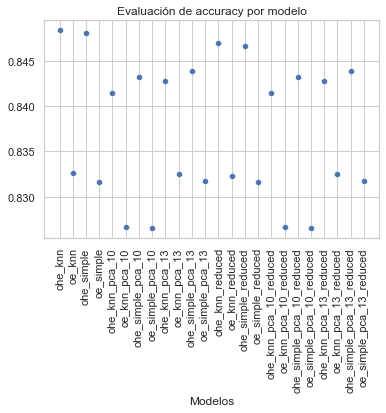

In [80]:
#Construcción de gráficos para visualizar las métricas accuracy y ROC-AUC:
acurr_graf  = [cvs[tname]['test_accuracy'].mean() for tname in data_processed.keys()]
roc_graf =  [abs(cvs[tname]['test_roc_auc'].mean()) for tname in data_processed.keys()]
sns.scatterplot(x = list(data_processed.keys()), y = acurr_graf )
plt.title("Evaluación de accuracy por modelo")
plt.xlabel("Modelos")
plt.xticks(rotation = 90);



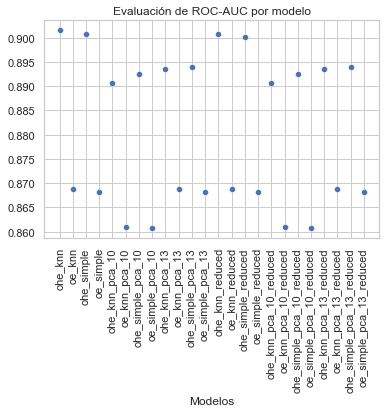

In [81]:

sns.scatterplot(x = list(data_processed.keys()), y = roc_graf)
plt.title("Evaluación de ROC-AUC por modelo")
plt.xlabel("Modelos")
plt.xticks(rotation = 90);

De acuerdo con la tabla resumen de los modelos se pueden indicar las siguientes observaciones: 
- Al tratarse de un problema de clasificación, en el que se considerar ambas clases, es importante evaluar las métricas de  
accuracy y roc_auc, que nos permiten visualizar un buen desempeño considerando ambas probabilidad del problema, en  
comparativa a las otras métricas utilizadas. Sin embargo, también hay que ser prudente con estas métricas, ya que como se   
visualizo en el histograma de la variable objetivo, este es un vector asimétrico, en donde toman peso las métricas f1,   
preccision y recall.  
- Además es posible visualizar que los modelos en los cuales se implementa OneHotEncoder tiene un mejor desempeño en los que  
se utilizo Ordinal Encoder.  
- Otro aspecto importante es que el PCA, que usa entre 10-13 variables, frente a las 32 variables con toda la data,  
tiene un buena relación de desempeño v/s tiempo de entrenamiento, es decir, usar 10 a 13 variables es menos costoso   
computacionalmente y el desempeño es optimo.  
- Por último, la la tabla resumen de los modelos, refuerza lo expuesto en un principio, con respecto a que el uso de   
imputacion por KKNImputer en todas las variables categóricas mejora el desempeño sistemáticamente para cada uno de los modelos.  